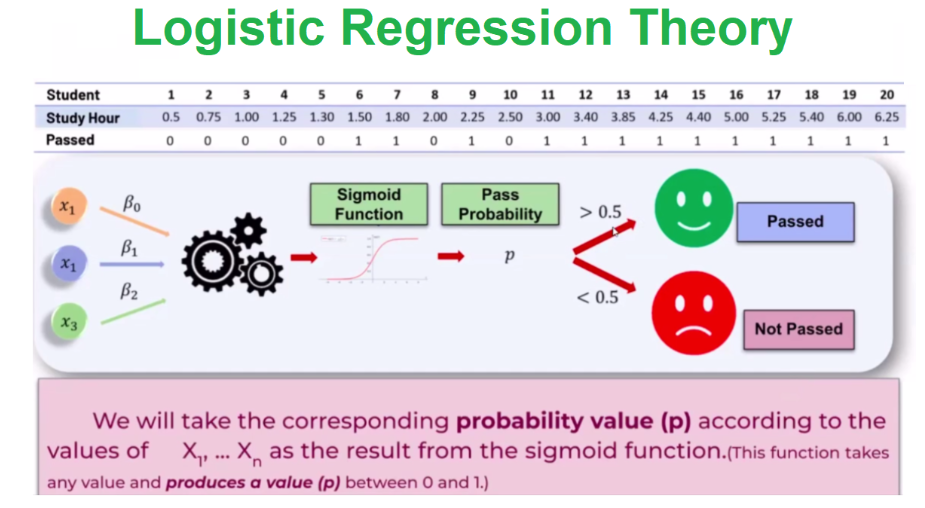

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Read dataset.
# Dataset is about hearing test.

df = pd.read_csv("hearing_test.csv")

In [4]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## Exploratory Data Analysis and Visualization

In [5]:
# Dimension of dataset.

df.shape

(5000, 3)

In [6]:
# General info about dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [9]:
# We check if dataset is unbalanced or not.

df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

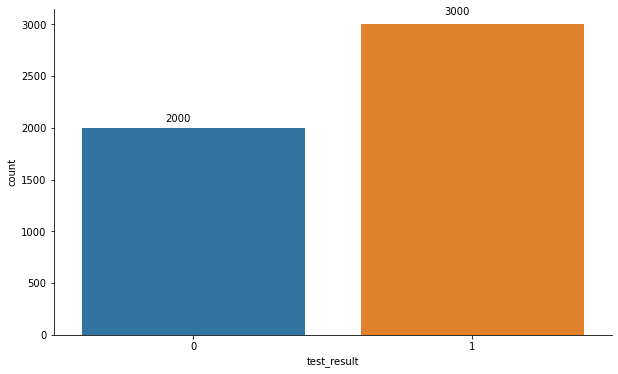

In [10]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

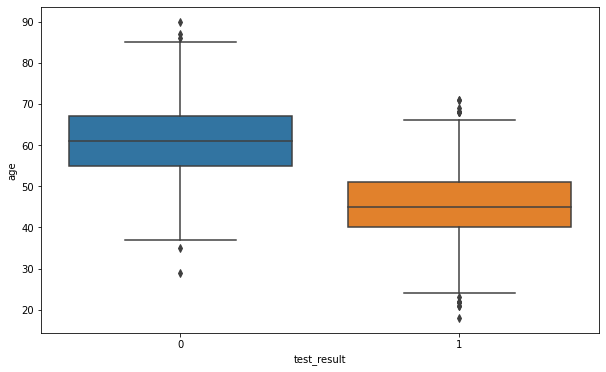

In [11]:
# We check if there is outlier.

sns.boxplot(x='test_result',y='age',data=df);

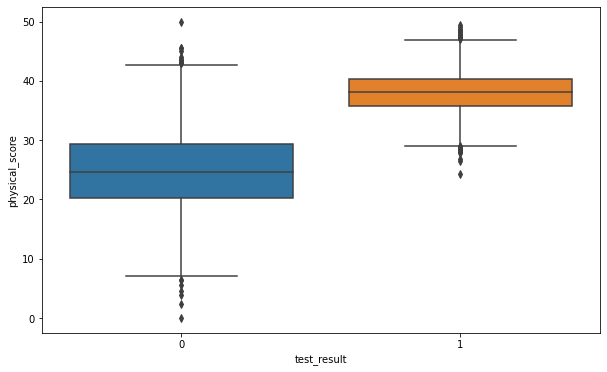

In [12]:
sns.boxplot(x='test_result',y='physical_score',data=df);

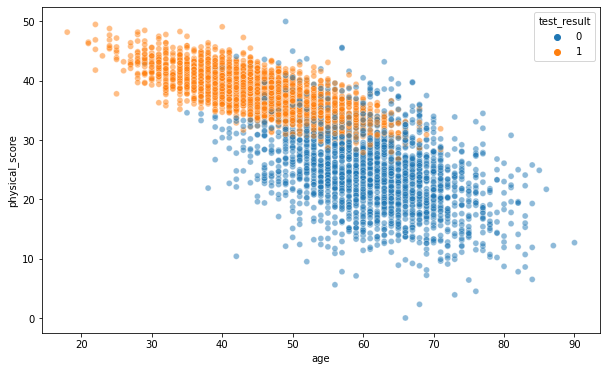

In [15]:
# Scatterplot: 
# '0' indicates people not having any problem regarding hearing test.
# '1' indicates people having hearing problem.

sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

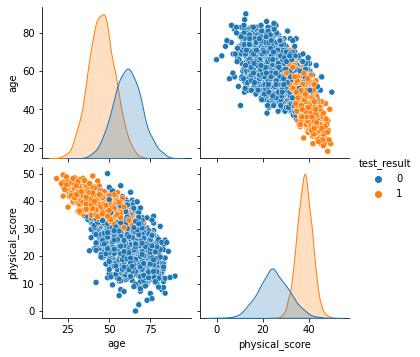

In [16]:
# We plot pairplots.

sns.pairplot(df,hue='test_result');

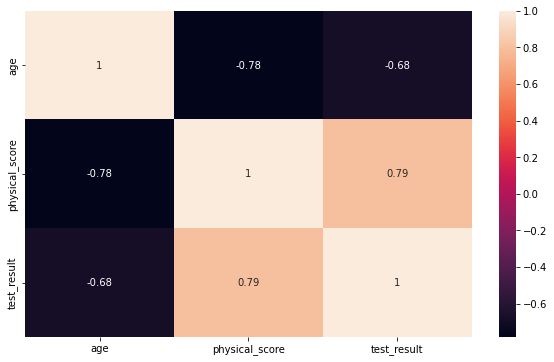

In [17]:
sns.heatmap(df.corr(), annot=True);

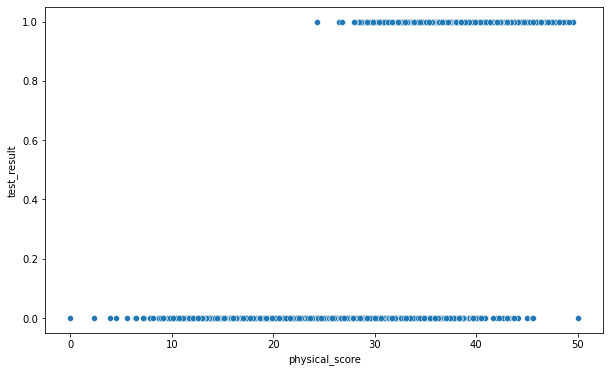

In [18]:
# target variable is test_result.

sns.scatterplot(x='physical_score',y='test_result',data=df);

## Train | Test Split and Scaling

In [19]:
# X: independent variable
# y: target (dependent) variable.

X = df.drop('test_result',axis=1)
y = df['test_result']

In [20]:
# import library 'train-test-split' and scaler.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# size of train dataset is set 10%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()

In [24]:
# Scaling process is applied to 'X_train' data.

X_train_scaled = scaler.fit_transform(X_train) # fit and then transform.
X_test_scaled = scaler.transform(X_test) # only transform.

## Modelling

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# We apply Logistic Regression.

log_model = LogisticRegression()

In [27]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [29]:
log_model.intercept_

array([0.48867341])

In [30]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [32]:
# The predictions regarding 'test' dataset are listed.

y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [33]:
# Probabilities are calculated for '0' (no hearing problem) and '1' (hearing problem exists).

y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [34]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [35]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [36]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [38]:
# Randomly chosen 10 results are shown.

test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3208,48.000,24.700,0,0.069,0
4235,40.000,40.900,1,0.993,1
4691,75.000,14.200,0,0.000,0
1461,63.000,29.900,0,0.159,0
92,57.000,34.500,1,0.688,1
1325,33.000,40.100,1,0.994,1
1926,44.000,35.200,1,0.899,1
853,68.000,28.700,0,0.069,0
30,62.000,19.000,0,0.002,0
83,51.000,35.500,1,0.848,1


## Model Performance on Classification Tasks

In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [40]:
accuracy_score(y_test,y_pred)

0.93

In [41]:
log_model.score(X_test_scaled, y_test)

0.93

In [42]:
precision_score(y_test, y_pred)

0.9331210191082803

In [43]:
recall_score(y_test, y_pred)

0.9543973941368078

In [44]:
f1_score(y_test, y_pred)

0.9436392914653785

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [46]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

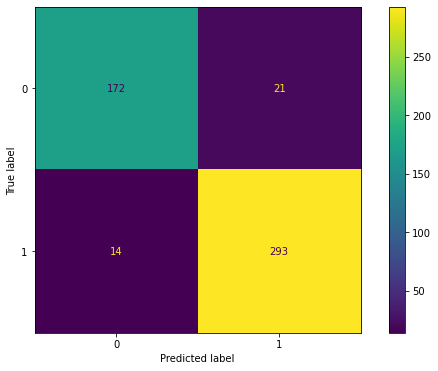

In [47]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

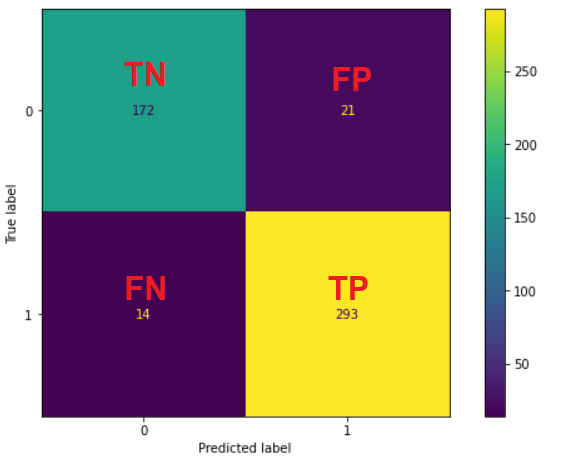

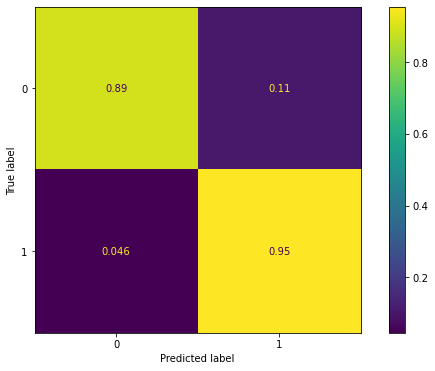

In [48]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

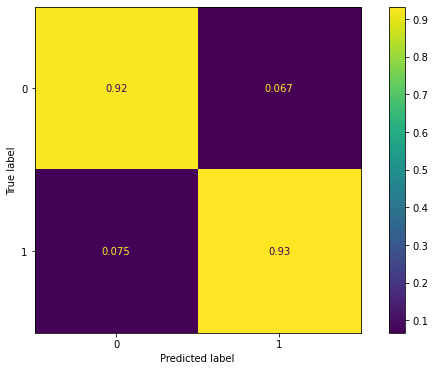

In [49]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [52]:
# We compare train set scores with test scores.

y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



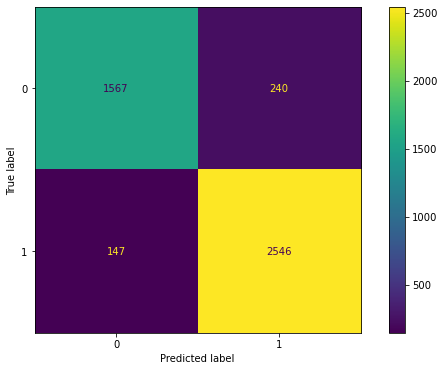

In [53]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validation

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [56]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.009,0.006,0.900,0.889,0.952,0.919
2,0.008,0.003,0.924,0.921,0.956,0.938
3,0.007,0.004,0.936,0.917,0.981,0.948
4,0.015,0.004,0.931,0.938,0.948,0.943
5,0.011,0.006,0.938,0.941,0.955,0.948
6,0.012,0.006,0.902,0.934,0.900,0.917
7,0.013,0.005,0.898,0.889,0.948,0.917
8,0.010,0.003,0.911,0.896,0.963,0.928
9,0.013,0.006,0.891,0.910,0.907,0.909
10,0.012,0.007,0.916,0.911,0.952,0.931


In [57]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [58]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [59]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

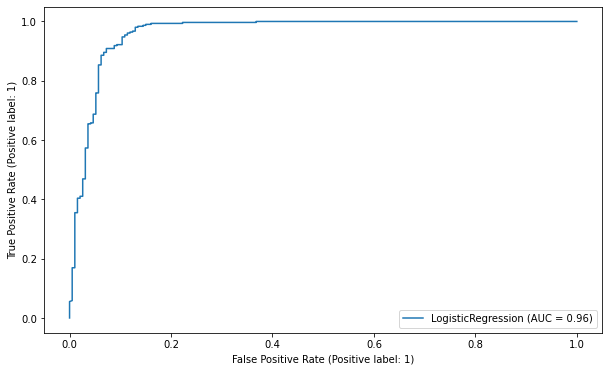

In [60]:
plot_roc_curve(log_model, X_test_scaled, y_test);

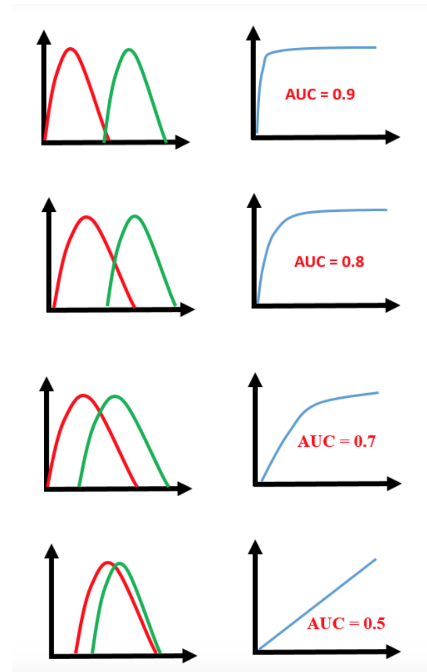

In [61]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

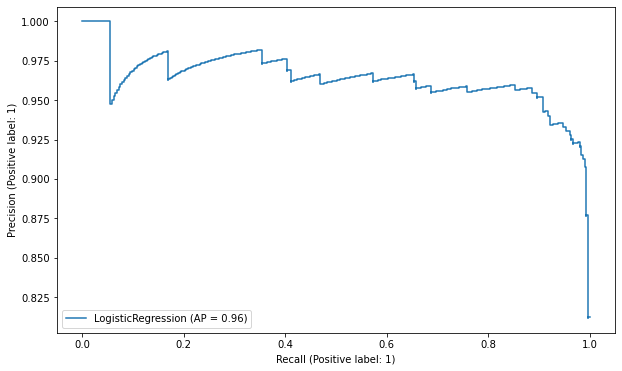

In [62]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [63]:
scaler = StandardScaler().fit(X)

In [64]:
import pickle

In [65]:
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_model = LogisticRegression().fit(X_scaled, y)

In [68]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [70]:
# We give some trial data for prediction.

my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [72]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [73]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [74]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [75]:
predictions = final_model.predict(sample_scaled)                   
predictions_proba = final_model.predict_proba(sample_scaled)      

In [76]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
